In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [65]:
df = pd.read_csv('data_science_job.csv')

In [66]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [35]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [36]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   21
company_size                  8
company_type                  6
training_hours              241
target                        2
dtype: int64

In [37]:
X  = df.drop(['enrollee_id'], axis=1)
y = df['enrollee_id']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape

((15326, 12), (3832, 12))

In [40]:
X_train.isnull().sum()

city                         0
city_development_index     378
gender                    3639
relevent_experience          0
enrolled_university        311
education_level            370
major_discipline          2237
experience                  48
company_size              4779
company_type              4943
training_hours             589
target                       0
dtype: int64

In [41]:
X_train.isnull().mean()

city                      0.000000
city_development_index    0.024664
gender                    0.237440
relevent_experience       0.000000
enrolled_university       0.020292
education_level           0.024142
major_discipline          0.145961
experience                0.003132
company_size              0.311823
company_type              0.322524
training_hours            0.038431
target                    0.000000
dtype: float64

In [42]:
# city_development_index
mean_cdi = X_train['city_development_index'].mean()
median_cdi = X_train['city_development_index'].median()
X_train['cdi_mean'] = X_train['city_development_index'].fillna(mean_cdi)
X_train['cdi_median'] = X_train['city_development_index'].fillna(median_cdi)

# training_hours
mean_training = X_train['training_hours'].mean()
median_training = X_train['training_hours'].median()
X_train['training_mean'] = X_train['training_hours'].fillna(mean_training)
X_train['training_median'] = X_train['training_hours'].fillna(median_training)


In [43]:
X_train.sample(5)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target,cdi_mean,cdi_median,training_mean,training_median
5860,city_28,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,<10,Pvt Ltd,NaN,0.0,0.939,0.939,65.18708,47.0
7763,city_103,0.920,Male,No relevent experience,Full time course,High School,NaN,12.0,NaN,NaN,8.0,1.0,0.920,0.920,8.00000,8.0
2882,city_11,0.550,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,50-99,NaN,90.0,1.0,0.550,0.550,90.00000,90.0
8956,city_103,0.920,Other,Has relevent experience,no_enrollment,Graduate,No Major,4.0,100-500,NaN,56.0,0.0,0.920,0.920,56.00000,56.0
3266,city_54,0.856,Male,Has relevent experience,Full time course,Graduate,STEM,15.0,<10,Pvt Ltd,332.0,0.0,0.856,0.856,332.00000,332.0


In [62]:
print('Original city_development_index:', X_train['city_development_index'].var())
print('Mean Imputed city_development_index:', X_train['cdi_mean'].var())
print('Median Imputed city_development_index:' ,X_train['cdi_median'].var())
print('Original training_hours:' ,X_train['training_hours'].var())
print('Mean Imputed training_hours:' ,X_train['training_mean'].var())
print('Median Imputed training_hours:' ,X_train['training_median'].var())


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [45]:
print("Variance difference CDI (mean vs orig):", 
      X_train['cdi_mean'].var() - X_train['city_development_index'].var())

print("Variance difference Training Hours (median vs orig):", 
      X_train['training_median'].var() - X_train['training_hours'].var())


Variance difference CDI (mean vs orig): -0.0003738095432387189
Variance difference Training Hours (median vs orig): -125.49403078180603


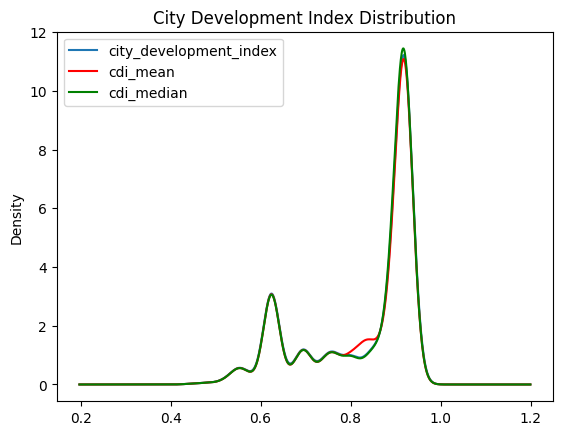

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['city_development_index'].plot(kind='kde', ax=ax)
X_train['cdi_mean'].plot(kind='kde', ax=ax, color='red')
X_train['cdi_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('City Development Index Distribution')
plt.show()

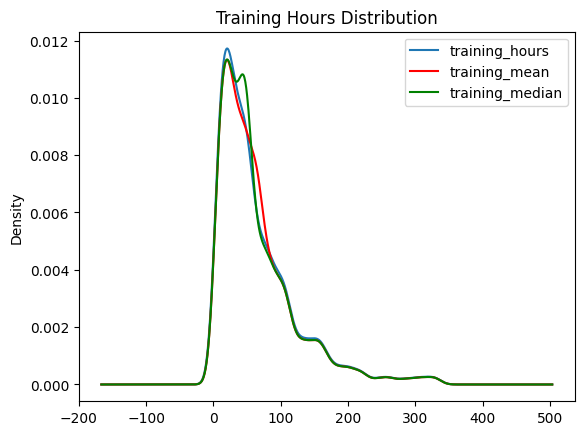

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['training_hours'].plot(kind='kde', ax=ax)
X_train['training_mean'].plot(kind='kde', ax=ax, color='red')
X_train['training_median'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title('Training Hours Distribution')
plt.show()

In [61]:
X_train.select_dtypes(include=['number']).cov()


AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [49]:
X_train.select_dtypes(include=['number']).corr()

,city_development_index,experience,training_hours,target,cdi_mean,cdi_median,training_mean,training_median
city_development_index,1.000000,0.329480,-0.002026,-0.341233,1.000000,1.000000,-0.001980,-0.001214
experience,0.329480,1.000000,-0.000169,-0.178192,0.325393,0.324179,-0.000167,0.000721
training_hours,-0.002026,-0.000169,1.000000,-0.025198,-0.001998,-0.002522,1.000000,1.000000
target,-0.341233,-0.178192,-0.025198,1.000000,-0.336949,-0.335316,-0.024727,-0.024310
cdi_mean,1.000000,0.325393,-0.001998,-0.336949,1.000000,0.995603,-0.001954,-0.001199
cdi_median,1.000000,0.324179,-0.002522,-0.335316,0.995603,1.000000,-0.002468,-0.001660
training_mean,-0.001980,-0.000167,1.000000,-0.024727,-0.001954,-0.002468,1.000000,0.998231
training_median,-0.001214,0.000721,1.000000,-0.024310,-0.001199,-0.001660,0.998231,1.000000


<Axes: >

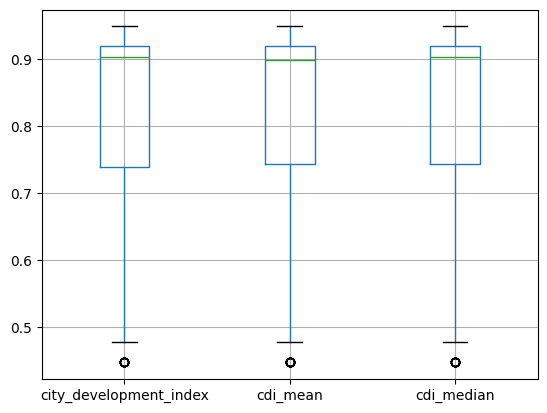

In [50]:
X_train[['city_development_index', 'cdi_mean', 'cdi_median']].boxplot()

<Axes: >

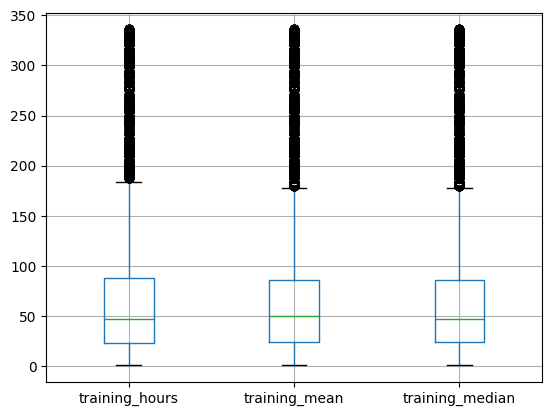

In [51]:
X_train[['training_hours', 'training_mean', 'training_median']].boxplot()

**Using Sklearn**

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [54]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['city_development_index']),
    ('imputer2', imputer2, ['training_hours'])
], remainder='passthrough')

In [55]:
trf.fit(X_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [56]:
trf.named_transformers_['imputer1'].statistics_

array([0.82925288])

In [58]:
trf.named_transformers_['imputer2'].statistics_

array([47.])

In [59]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [60]:
X_train

array([[0.91, 16.0, 'city_16', ..., nan, nan, 1.0],
       [0.897, 262.0, 'city_136', ..., '1000-4999', 'Pvt Ltd', 0.0],
       [0.91, 24.0, 'city_16', ..., nan, nan, 0.0],
       ...,
       [0.893, 57.0, 'city_36', ..., '10/49', 'Early Stage Startup', 1.0],
       [0.624, 16.0, 'city_21', ..., nan, nan, 0.0],
       [0.866, 50.0, 'city_57', ..., '100-500', 'Pvt Ltd', 0.0]],
      shape=(15326, 12), dtype=object)